## Overall front-back normalization

In [1]:
#include "cali.h"

In [2]:
//get data from sort00335.root file
TFile *ipf = new TFile("~/data/FBcalibration/sort00335.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCanvas *c1=new TCanvas("c1","c1");
tree->SetBranchAddress("xhit",&xhit);
tree->SetBranchAddress("yhit",&yhit);
tree->SetBranchAddress("x",&x);
tree->SetBranchAddress("y",&y);
tree->SetBranchAddress("xe",&xe);
tree->SetBranchAddress("ye",&ye);
tree->SetBranchAddress("mwe",&mwe);
tree->SetBranchAddress("ve",&ve);
tree->SetBranchAddress("xt",&xt);
tree->SetBranchAddress("yt",&yt);
tree->SetBranchAddress("mwt",&mwt);
tree->SetBranchAddress("vt",&vt);

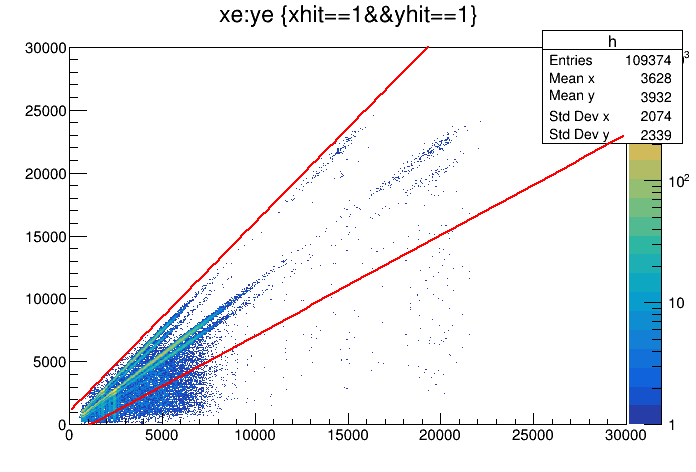

In [3]:
//front back correlation
tree->Draw("xe:ye>>h(500,0,30000,500,0,30000)","xhit==1&&yhit==1","colz");
c1->SetLogz();
c1->Draw();
TF1 *fup = new TF1("fup","[0]+[1]*x",0,30000);
TF1 *flow = new TF1("flow","[0]+[1]*x",0,30000);
fup->SetParameters(1000,1.5);
fup->Draw("same");
flow->SetParameters(-1000,0.8);
flow->Draw("same");

## Get the strip with maximum counts

In [4]:
THStack *ths = new THStack("ths","DSSD: Counts in front-back strips");
TH1F *thf = new TH1F;
TH1F *thb = new TH1F;
Int_t cntx,cnty;

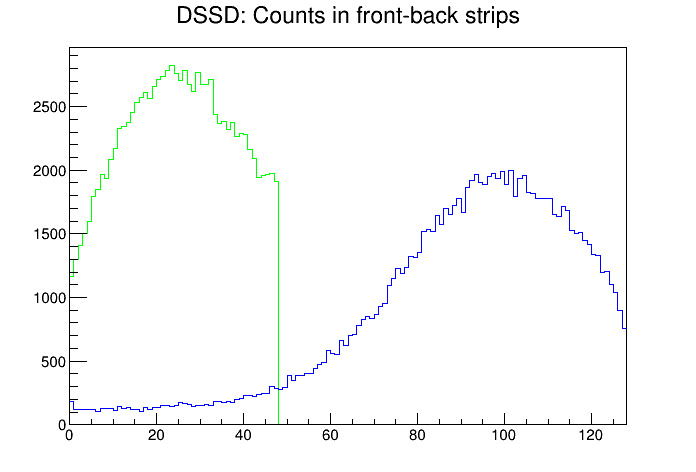

front: 24  back: 102


In [5]:
tree->Draw("y>>hf(48,0,48)","xhit==1&&yhit==1");
tree->Draw("x>>hb(128,0,128)","xhit==1&&yhit==1");
hf->SetLineColor(3);
hb->SetLineColor(4);
ths->Add(hf);
ths->Add(hb);
ths->Draw("nostack");
c1->Draw();
cnty=hf->GetMaximumBin();
cntx=hb->GetMaximumBin();
thf=hf;
thb=hb;
cout<<"front: "<<cnty<<"  back: "<<cntx<<endl;

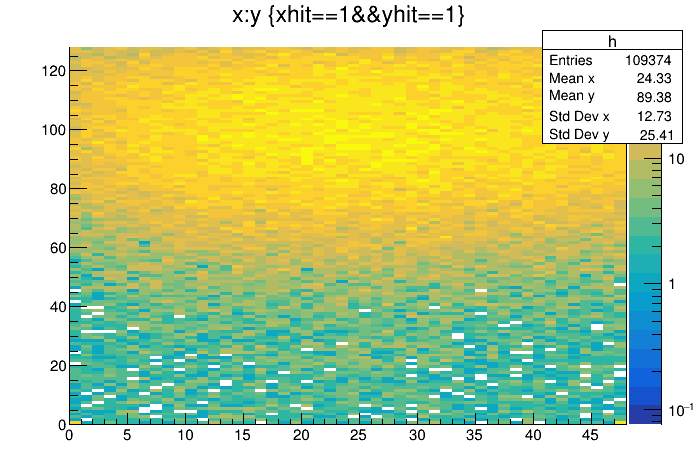

In [6]:
tree->Draw("x:y>>h(48,0,48,128,0,128)","xhit==1&&yhit==1","colz");
c1->Draw();

## Normalization of front strips
### Back strips normalize to cnty strip, then front strips normalize to the back strips with counts >1500

In [7]:
Int_t cx=0;
Int_t cy=0;

In [8]:
//counts from front strips
for(int i=0;i<48;i++) {
    if(thf->GetBinContent(i+1)>2000) cy++;
    cout<<thf->GetBinContent(i+1)<<"  ";
}
cout<<endl<<"The number with counts in the strips >2000: "<<cy<<endl;

1168  1301  1405  1505  1600  1797  1846  1968  1937  2083  2173  2328  2346  2375  2452  2531  2573  2612  2565  2655  2714  2738  2781  2825  2756  2707  2785  2674  2619  2766  2671  2677  2716  2439  2367  2384  2318  2376  2265  2287  2283  2163  2091  1945  1961  1965  1973  1908  
The number with counts in the strips >2000: 34


In [9]:
//counts from back strips
for(int i=0;i<128;i++) {
    if(thb->GetBinContent(i+1)>1500) cx++;
    cout<<thb->GetBinContent(i+1)<<"  ";
}
cout<<endl<<"The number with counts in the strips >1500: "<<cx<<endl;

183  117  121  123  119  121  107  127  129  130  111  141  128  135  123  117  107  134  120  137  138  151  151  142  153  172  165  158  140  149  154  157  155  182  181  172  183  175  200  203  231  230  222  235  247  246  302  283  276  294  387  347  385  387  401  405  444  470  486  582  563  553  659  625  705  712  780  829  847  837  870  933  951  1096  1150  1225  1188  1238  1323  1314  1353  1519  1533  1520  1643  1571  1696  1651  1720  1775  1670  1867  1920  1963  1900  1888  1947  1971  1938  1993  1889  1999  1795  1937  1955  1828  1817  1779  1774  1778  1777  1654  1640  1711  1680  1526  1500  1507  1444  1418  1335  1331  1197  1207  1099  1040  895  755  
The number with counts in the strips >1500: 36


In [10]:
Int_t xid[36];
Int_t yid[34];

In [11]:
//save the strip id
cx=0;cy=0;
for(int i=0;i<48;i++) if(thf->GetBinContent(i+1)>2000) {yid[cy]=i+1;cout<<yid[cy]<<"  ";cy++;}
cout<<endl;
for(int i=0;i<128;i++) if(thb->GetBinContent(i+1)>1500) {xid[cx]=i+1;cout<<xid[cx]<<"  ";cx++;}

10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  
82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  118  

In [12]:
cout<<xid[35]<<"  "<<yid[10]<<endl;

118  20


## Save pixels data to root file: gdata335.root

In [13]:
TString stree,hname;
TGraph *grx[128][48];
TString sdx,sdy;
TString scutx,scuty,scutxy;
TString stmp;
TString fgname;
TFile *fg;
Int_t ng;

In [14]:
fgname.Form("grdet%d.root",335);
if(!gSystem->AccessPathName(fgname.Data())) {
    cout<<"file "<<fgname<<" File exist! reading graph data from "<<fgname<<endl;
    fg=new TFile(fgname.Data());
    for(int i=0;i<128;i++) {
        for(int j=0;j<48;j++) {
            hname.Form("gr%03d_%03d",i,j);
            grx[i][j]=(TGraph*) gROOT->FindObject(hname);   
            cout<<".";
        }
        cout<<endl;
        TString sout;
        sout.Form("dssd, i= %03d", i);
        cout<<sout<<endl;
    }
}
else{
    fg=new TFile(fgname.Data(),"RECREATE");//create new file
    cout<<"creating TGraph from pixels ..."<<endl;
    for(int i=0;i<128;i++) {
        sdx.Form("xe[0]");
        for(int j=0;j<48;j++) {
            sdy.Form("ye[0]");//   
            scutxy.Form("xe[0]>50&&ye[0]>50&&xhit==1&&yhit==1&&x[0]==%d&&y[0]==%d",i,j);
            stree.Form("%s:%s",sdy.Data(),sdx.Data());
            tree->Draw(stree.Data(),scutxy.Data());
            tmpgr->Clear();
            grx[i][j] = new TGraph(tree->GetSelectedRows(),tree->GetV2(), tree->GetV1());
            hname.Form("gr%03d_%03d",i,j);
            
            grx[i][j]->SetName(hname.Data());
            grx[i][j]->Write();
            cout<<".";
            }
            cout<<endl;
            TString sout;
            sout.Form("dssd, i= %03d",  i);
            cout<<sout<<endl;
        }
    fg->Close();
}

file grdet335.root File exist! reading graph data from grdet335.root
................................................
dssd, i= 000
................................................
dssd, i= 001
................................................
dssd, i= 002
................................................
dssd, i= 003
................................................
dssd, i= 004
................................................
dssd, i= 005
................................................
dssd, i= 006
................................................
dssd, i= 007
................................................
dssd, i= 008
................................................
dssd, i= 009
................................................
dssd, i= 010
................................................
dssd, i= 011
................................................
dssd, i= 012
................................................
dssd, i= 013
................................................
dssd, i= 014
.

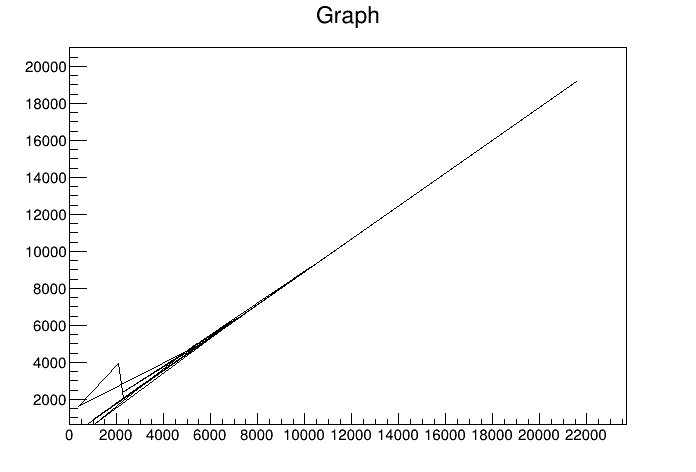

In [15]:
c1->Clear();
grx[100][20]->Draw();
c1->Draw();

## x strips with counts>1500 normalize to y:cnty strips

In [16]:
TGraph *grxc[128];
TF1 *fpar1= new TF1("fp1","pol1",50,10000);
TF1 *fpar2= new TF1("fp2","pol2",50,10000);
TH2F *hres[128];
TH2F *hressum = new TH2F("hressum","hressum",100,-50,50,1000,50,10000);
TString outinf,sout,hresname;
double par[2],par2[128][3], chi2ndf[128];
int xmax[128],Ncx[128],ymax[48];

In [17]:
outinf.Form("%4s%9s%11s%20s%16s%8s%8s","i","p0","p1","p2","chi2/ndf","xmax","Nc");
cout<<outinf<<endl;
for(int i=xid[0]; i<=xid[35]; i++) {
    if(i<0 || i>127) continue;
    grxc[i]=new TGraph;
    int ng=0;
    
    //refine the cut range with linear fit
    if(grx[i][cnty]->GetN()>20) {
        grx[i][cnty]->Fit(fpar1,"Q ROB");
        fpar1->GetParameters(&par[0]);
        for(int k=0; k<grx[i][cnty]->GetN(); k++) {
            double x=grx[i][cnty]->GetX()[k];
            double y=grx[i][cnty]->GetY()[k];
            if (abs(y-(par[0]+par[1]*x))<20) {
                grxc[i]->SetPoint(ng,x,y);
                ng++;
            }
        }
    }
    //fit with pol2
    grxc[i]->Fit(fpar2,"Q");
    fpar2->GetParameters(&par2[i][0]);
    chi2ndf[i]=fpar2->GetChisquare()/fpar2->GetNDF();
    hresname.Form("hres%03d",i);
    hres[i] = new TH2F(hresname,hresname,100,-50,50,1000,50,10000);
    xmax[i]=0;
    hres[i]->Reset();
    for(int j = 0;j < grx[i][cnty]->GetN(); j++){
        double x=grx[i][cnty]->GetX()[j];
        double y=grx[i][cnty]->GetY()[j];
        if(x>xmax[i]) xmax[i]=x;
        x = y-(par2[i][0]+par2[i][1]*x+par2[i][2]*x*x);
        hres[i]->Fill(x,y);
        hressum->Fill(x,y);
    }
    Ncx[i]=grxc[i]->GetN();
    sout.Form("%4d%9.2f%11.6f%20e%16.2f%8d%8d"  ,i  ,par2[i][0]  ,par2[i][1]  ,par2[i][2]  ,chi2ndf[i], xmax[i],Ncx[i]);
    cout<<sout<<endl;
}

   i       p0         p1                  p2        chi2/ndf    xmax      Nc
  82    -1.83   0.907432       -4.882044e-07           14.27    9320      39
  83     8.31   0.898727       -6.206571e-08           31.74    9138      25
  84     1.58   0.916023        1.988955e-08           11.18    7683      32
  85     2.51   0.909460       -6.057856e-08           25.00    8168      26
  86    -3.94   0.916460       -2.843207e-07           24.10    7231      27
  87     4.15   0.914064       -8.418434e-08           21.03    8992      33
  88    -3.44   0.893563       -4.442366e-07           22.57    7797      30
  89     1.12   0.907517        4.331132e-08           13.86    7386      30
  90    -7.10   0.917537       -5.300017e-07           20.28    8551      33
  91     8.28   0.909968        2.028043e-07           17.99   21182      39
  92     9.34   0.890033       -9.900906e-08           29.71    8488      33
  93    -4.77   0.909713       -4.247705e-07           15.47    8751      50

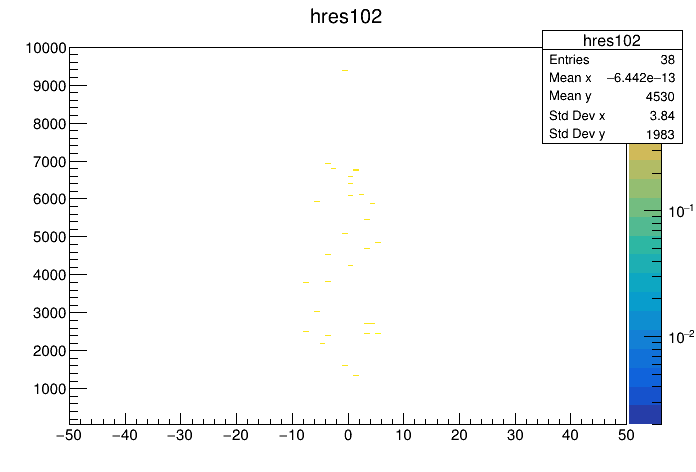

In [18]:
hres[cntx]->Draw("colz");
c1->Draw();//may be the statistic is poor, combine the data in the following

## Combine the data with xid[0]-xid[35], inspect the residual

In [19]:
TGraph *grsumx=new TGraph;
TH2F *hsumresx = new TH2F("hsumrex","hsumresx",100,-50,50,1000,50,10000);
int ngs=0;

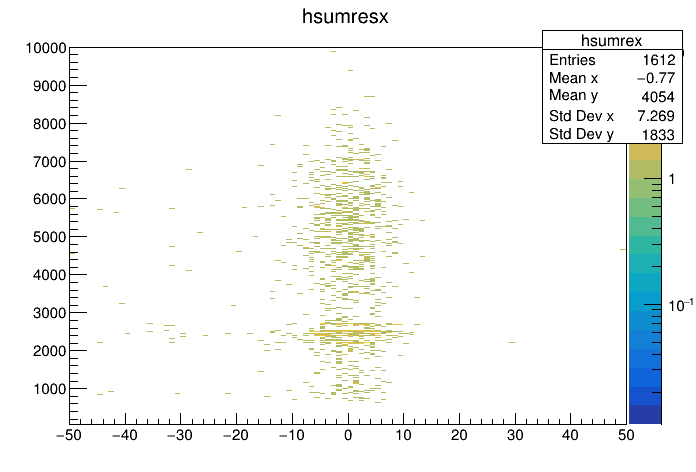

In [20]:
hsumresx->Reset();
for(int i=xid[0];i<=xid[35];i++) {
    if(i<0 || i>127) continue;
    for(int j=0;j<grx[i][cnty]->GetN();j++) {
        double x=grx[i][cnty]->GetX()[j];
        double y=grx[i][cnty]->GetY()[j];
        x = par2[i][0]+par2[i][1]*x+par2[i][2]*x*x;
        grsumx->SetPoint(ngs,x,y);
        hsumresx->Fill(x-y,y);
        ngs++;
    }    
}
hsumresx->Draw("colz");
c1->Draw();//draw the histogram

## inspecting the front-back correlation

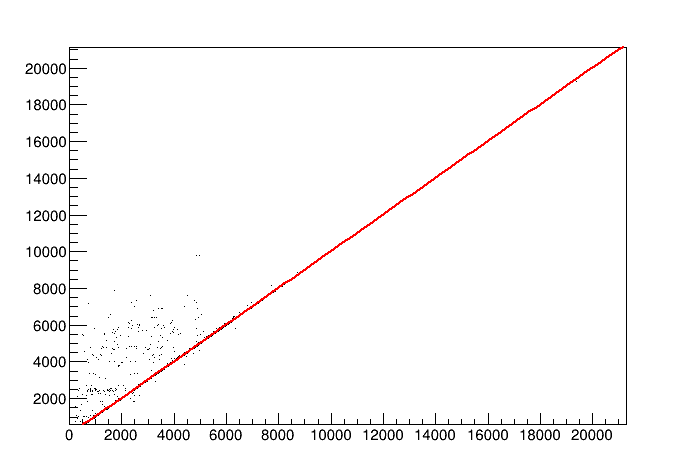

In [21]:
c1->Clear();
grsumx->Draw("AP");
grsumx->Fit(fpar1,"Q ROB");
c1->Draw();//inspect the front-back correlation

## Normalize front side to back strips with xid[0]-xid[35]

In [22]:
TGraph *grsy[48];//normalize front to back y->x
TGraph *grsyc[48];
double par2y[48][3];
TH2F *hy[48], *hresy[48];
TF1 *fpy1[48],*fpy2[48];
TH2F *hsumresy = new TH2F("hsumrey","hsumresy",100,-50,50,1000,50,10000);

In [23]:
for(int i=0;i<48;i++) {
    int ngy=0;
    grsy[i]=new TGraph;
    for(int j=xid[0];j<=xid[35];j++) {
        if(j<0 || j>128) continue;
        for(int k=0;k<grx[j][i]->GetN();k++) {
            double x=grx[j][i]->GetX()[k];
            double y=grx[j][i]->GetY()[k];
            x = par2[j][0]+par2[j][1]*x+par2[j][2]*x*x;
            grsy[i]->SetPoint(ngy,y,x);//swap x,y for TGraph fit, x=ky+b;
            ngy++;
        }
    }
    TString sname;
    sname.Form("p%02dy",i);
    fpy1[i]=new TF1(sname.Data(),"pol1",50,10000);
    fpy1[i]->SetLineColor(kRed);
    int ng=0;
    grsyc[i]=new TGraph;
    //refie the fitting range with pol1 fit
    if(grsy[i]->GetN()>20) {
        grsy[i]->Fit(fpy1[i],"Q ROB");
        fpy1[i]->GetParameters(&par[0]);
        for(int k=0; k<grsy[i]->GetN(); k++) {
            double x=grsy[i]->GetX()[k];
            double y=grsy[i]->GetY()[k];
            if (abs(y-(par[0]+par[1]*x))<20) {
                grsyc[i]->SetPoint(ng,x,y);
                ng++;
            }
        }
    }
    sname.Form("h%02dy",i);
    hy[i]=new TH2F(sname.Data(),sname.Data(),1000,0,10000,1000,0,10000);
    for(int j = 0;j < grsyc[i]->GetN();j++)  
        hy[i]->Fill(grsyc[i]->GetX()[j],grsyc[i]->GetY()[j]);
    //using pol2 fit function
    sname.Form("p%02dy2",i);
    fpy2[i]=new TF1(sname.Data(),"pol2",50,10000);
    fpy2[i]->SetLineColor(kGray);
    
    grsyc[i]->Fit(fpy2[i],"Q");
    fpy2[i]->GetParameters(&par2y[i][0]);
    chi2ndf[i]=fpy2[i]->GetChisquare()/fpy2[i]->GetNDF();
    hresname.Form("hresy%02d",i);
    hresy[i] = new TH2F(hresname,hresname,100,-50,50,1000,50,10000);
    ymax[i]=0;
    for(int j=0;j<grsyc[i]->GetN(); j++)
        if( grsyc[i]->GetX()[j]>xmax[i] ) ymax[i]=grsyc[i]->GetX()[j];
    
    for(int j=0;j< grsy[i]->GetN(); j++){
        double x=grsy[i]->GetX()[j];
        double y=grsy[i]->GetY()[j];
        x = y-(par2y[i][0]+par2y[i][1]*x+par2y[i][2]*x*x);
        hresy[i]->Fill(x,y);      
        hsumresy->Fill(x,y);
    }
    Ncx[i]=grsyc[i]->GetN();
    sout.Form("%4d%9.2f%11.6f%20e%16.2f%8d%8d"  ,i  ,par2y[i][0]  ,par2y[i][1]  ,par2y[i][2]  ,chi2ndf[i], ymax[i],Ncx[i]);
    cout<<sout<<endl;
}

   0     1.25   1.358936        1.221483e-07           27.69    4353     473
   1     4.19   1.032058        1.118746e-07           23.55    2127     582
   2     1.84   1.027748        2.457892e-08           21.25    2146     649
   3     0.93   1.021599       -4.010390e-08           23.56    2332     667
   4     2.06   1.010580       -3.708806e-08           21.20    2505     708
   5     2.68   1.016249        4.971716e-08           22.60     965     801
   6     0.36   1.013729        7.779022e-09           19.76    6875     830
   7     0.68   1.004732       -6.563796e-09           23.67    4098     935
   8     1.06   1.002148       -4.092972e-08           23.30    5155     902
   9     1.28   0.991509        1.310064e-08           22.59    2217     930
  10     1.37   0.998798       -1.614279e-08           24.05    3347     964
  11     0.71   1.023495       -3.225337e-08           22.17    5460    1059
  12     0.04   1.018646       -4.999469e-08           23.54    2450    1052

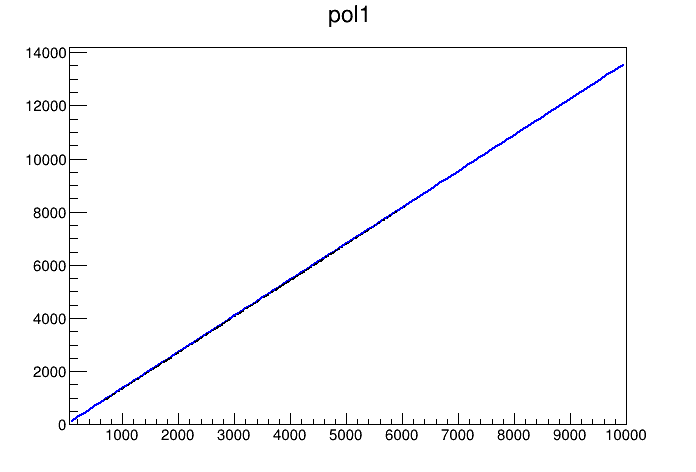

In [24]:
c1->Clear();
fpy1[0]->SetLineColor(kBlue);
fpy1[0]->Draw("");
hy[0]->Draw("same");
c1->Draw();

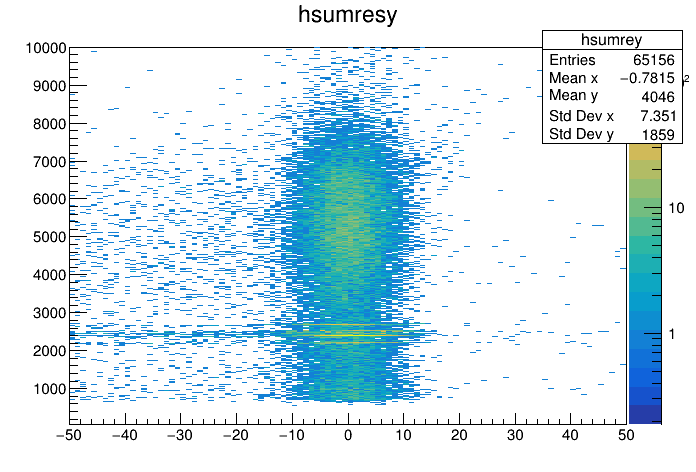

In [25]:
hsumresy->Draw("colz");
c1->Draw();//inspecting the residual

## Normalize the back side to front with y:yid[0]-yid[33]

In [26]:
int Ncy[128];
TGraph *grsx[128];//x->y
TGraph *grsxc[128];
double par2x[128][3];
TH2F *hx[128], *hresx[128];
TF1 *fpx1[128],*fpx2[128]; 

In [27]:
par2y[20][2]

(double) 3.3162286e-08


In [28]:
hsumresx->Clear();
for(int i=0;i<128;i++) {
    int ngy=0;
    grsx[i]=new TGraph;
    for(int j=yid[0];j<=yid[33];j++) {
        if(j<0 || j>31) continue;
        for(int k=0;k<grx[i][j]->GetN();k++) {
            double x=grx[i][j]->GetX()[k];
            double y=grx[i][j]->GetY()[k];
            y = par2y[j][0]+par2y[j][1]*y+par2y[j][2]*y*y;
            grsx[i]->SetPoint(ngy,x,y);
            ngy++;
        }
    }
    
    TString sname;
    sname.Form("p%03dx",i);
    fpx1[i]=new TF1(sname.Data(),"pol1",50,10000);
    fpx1[i]->SetLineColor(kGreen);
    int ng=0;
    grsxc[i]=new TGraph;
    //refined the fitting range with pol1 fit
    if(grsx[i]->GetN()>20) {
        grsx[i]->Fit(fpx1[i],"Q ROB");
        fpx1[i]->GetParameters(&par[0]);
        for(int k=0; k<grsx[i]->GetN(); k++) {
            double x=grsx[i]->GetX()[k];
            double y=grsx[i]->GetY()[k];
            if (abs(y-(par[0]+par[1]*x))<20) {
                grsxc[i]->SetPoint(ng,x,y);
                ng++;
            }
        }
    }
    
    sname.Form("h%03dx",i);
    hx[i]=new TH2F(sname.Data(),sname.Data(),1000,0,10000,1000,0,10000);
    for(int j = 0;j< grsxc[i]->GetN();j++)  
        hx[i]->Fill(grsxc[i]->GetX()[j],grsx[i]->GetY()[j]);
    //fit using pol2 function
    sname.Form("p%03dx",i);
    fpx2[i]=new TF1(sname.Data(),"pol2",50,10000);
    fpx2[i]->SetLineColor(kGreen);
    grsxc[i]->Fit(fpx2[i],"Q");
    fpx2[i]->GetParameters(&par2x[i][0]);
    chi2ndf[i]=fpx2[i]->GetChisquare()/fpx2[i]->GetNDF();
    hresname.Form("hresx%03d",i);
    hresx[i] = new TH2F(hresname,hresname,100,-50,50,1000,50,10000);
    xmax[i]=0;
    
    for(int j = 0;j < grsxc[i]->GetN(); j++)
        if( grsxc[i]->GetX()[j]>ymax[i] ) xmax[i]=grsxc[i]->GetX()[j];
    for(int j = 0;j < grsx[i]->GetN(); j++){
        double x=grsx[i]->GetX()[j];
        double y=grsx[i]->GetY()[j];
        x = y-(par2x[i][0]+par2x[i][1]*x+par2x[i][2]*x*x);
        hresx[i]->Fill(x,y);
        hsumresx->Fill(x,y);
    }
    Ncy[i]=grsxc[i]->GetN();
    sout.Form("%4d%9.2f%11.6f%20e%16.2f%8d%8d"  ,i  ,par2x[i][0]  ,par2x[i][1]  ,par2x[i][2]  ,chi2ndf[i], xmax[i],Ncy[i]);
    cout<<sout<<endl;
}

   0     2.30   0.917899       -2.038324e-07           15.29    8535      48
   1     3.16   0.911864       -1.267471e-07           27.21    4097      53
   2     2.43   0.912291       -2.003950e-07           27.19    2558      52
   3     2.01   0.908180       -1.612502e-07           17.74    2419      44
   4     7.43   0.925972        2.872177e-07           18.43    2639      39
   5     1.41   0.918927       -3.141538e-07           17.88    1065      65
   6     4.21   0.914695        4.041472e-08           24.87    7688      43
   7    -0.75   0.918769       -3.481771e-07           18.98    9127      47
   8     1.36   0.919556       -2.342894e-07           17.97    6068      52
   9    -0.49   0.927838       -3.750016e-07           15.17    3026      52
  10     1.06   0.917418       -1.676497e-07           16.01    3802      54
  11     1.40   0.907038       -3.898177e-07           18.06    8474      52
  12     3.30   0.908879       -1.226023e-07           15.88    3876      57

 107     1.62   0.916750       -1.748525e-07           18.32    2581     691
 108     1.03   0.918229       -1.822149e-07           19.59    5409     670
 109     3.62   0.901118       -5.573884e-08           19.44    2812     708
 110     4.39   0.900850       -5.623310e-09           21.89    2807     753
 111     1.16   0.913724       -1.710647e-07           19.37    6787     647
 112     1.59   1.013994       -1.996839e-07           24.89    7326     631
 113     3.75   0.993400       -8.819094e-08           22.06    6014     658
 114     2.58   0.999389       -7.447223e-08           21.24    4015     595
 115     1.92   1.004476       -2.093059e-07           23.86    2393     582
 116     4.85   1.008561       -7.792320e-08           23.99    6662     602
 117     2.38   1.014289       -1.984285e-07           23.93    2456     597
 118     2.21   1.010815       -1.476875e-07           20.83    2375     573
 119     1.90   0.978067       -2.188250e-07           24.03    2457     601

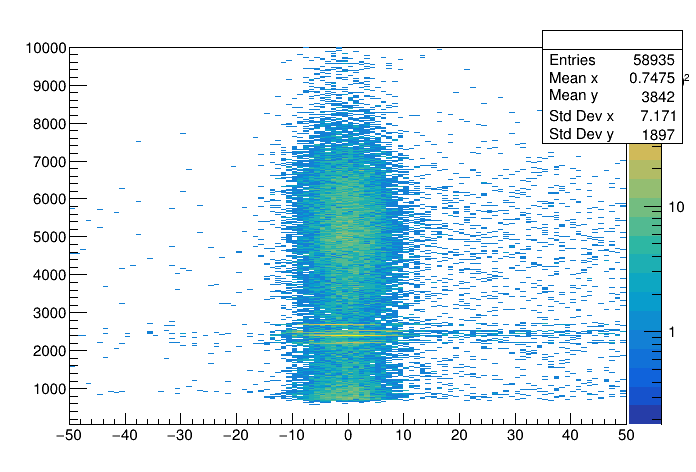

In [29]:
c1->Clear();
hsumresx->Draw("colz");
c1->Draw();

In [30]:
//output the parameters
ofstream opar("fbnorm.txt");

In [31]:
for(int i=0;i<176;i++){
    if(i<128) opar<<i<<" "<<par2x[i][0]<<" "<<par2x[i][1]<<" "<<par2x[i][2]<<endl;
    else opar<<i<<" "<<par2y[i-128][0]<<" "<<par2y[i-128][1]<<" "<<par2y[i-128][2]<<endl;
}